# Victor Ramirez #
CMSE 491 <br/>
Fall 2017 <br/>
Homework 1 <br/>

Disclaimer: I worked with Kyle Zimmer in problems 1, 3 and 5. 

### 1. 
Let $G$ be a simple (no loops), undirected graph with adjacency matrix $A$. <br/>
a) Prove that the degree of vertex $v_{i}$ is the ith diagonal entry in $A^{2}$ <br/>
b) What is in entry $(i, j)$ of $A^{2}$ in terms of the graph? Generalize this statement to entry
$(i, j)$ of $A^{n}$ and prove the statement.

### Solution:
   



The $k \times k$ adjacency matrix $A$ is defined as:


$$
\mathbf{A} = \left[\begin{array}
{rrr}
A_{11} & A_{12} & \dots & A_{1k} \\
A_{21} & A_{22} & \dots & A_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
A_{k1} & A_{k2} & \dots & A_{kk}
\end{array}\right]
$$



The elements $A_{ij}$ of the Adjacency Matrix $A$ are defined as:

$$
v_iv_j = A_{ij} = \left\{\begin{array}{lr}
	1, & \text{when $v_{i}$ and $v_{j}$ are adjacent}\\
	0, & \text{otherwise}\\
	\end{array}\right\} [1]
$$


where each element in the row vector $\vec{v_i}$ containing the vertex $v_i$ $\times$ the row vector of the vertices in the graph, $\vec{v}$. 

$$\mathbf{\vec{{v_i}}} = v_i
\left[\begin{array}
{rrr}
v_1 & v_2 & \dots & v_k
\end{array}\right]
= v_i
 \left[\begin{array}
{rrr}
A_{11} & A_{12} & \dots & A_{1k}
\end{array}\right]
$$

Likewise, $\vec{v_i}^{T}$ = $v_i$ $\times$ the column vector of the vertices in the graph, $\vec{v}^{T}$. 

The vector $\vec{v_i}$ contains elements which signal whether $v_i$ is adjacent to $v_j$ or not as defined by [1]. The degree is defined as the sum of the adjacent vertices for any given vertex. Thus, for vertex $v_i$ the degree $deg(v_i)$ is the sum of the elements in $\vec{v_i}$. This is expressed as:

$$
\sum_{j=1}^{k} v_{i}v_{j} = deg(v_{i})
$$

The sum on the lefthand side for j is just the vector $\vec{v}$. This can thus be rewritten as:
$$
deg(v_{i}) = \vec{v_i}\vec{{v}^{T}}
$$
Calculating the ith diagonal of the Adjacency matrix squared gives:

$$
A^{2}_{ii} = A_{i1}A_{1i} + A_{i2}A_{2i} + \dots + A_{ik}A_{ki} \\
= \vec{v_i}\vec{{v}^{T}} \\
= deg(v_{i})
$$





b) Definition [1] contains $A_{ij}^1$. $A_{ij}^2$ is thus:
$$
A_{ij} \times A_{ij}
$$

For $v_i$ adjacent to $v_j$, this will equal to 1 by [1]. For $v_i$ not adjacent to $v_j$, this will equal 0. Raising it to the kth power will yield the same thing. Thus we can generalize [1] as:

$$
A_{ij}^{k} = \left\{\begin{array}{lr}
	1, & \text{when $v_{i}$ and $v_{j}$ are adjacent}\\
	0, & \text{otherwise}\\
	\end{array}\right\}
$$

### 3.

Let $K$ be a simplicial complex. Prove that $K$ is a geometric realization of the nerve of the collection of vertex stars in $K$.

Key definitions:


[1] $St(\sigma)$ = the union of interiors of simplices with $\sigma$ as a face = the collection of simplices that connect to $\sigma$ <br/>
[2] $Nrv(F) = \{X \subseteq{F} | \cap{X} \ne \emptyset\} $ <br/>
[3] (Nerve Lemma) Let $F$ be a finite collection of closed, convex sets in Euclidean space.
Then the nerve of $F$, $Nrv(F)$, and the union of the sets in $F$, $\cup{F}$ have the same
homotopy type.

### Solution

Define a vertex $v$ that is equivalently defined as a 0-simplex, or point, such that v $\in$ $\sigma$, $\sigma$ $\in$ $K$. 

Because $v$ is a face of itself, $v \in St(v)$, where $St(v)$ is:

$$
St(v) = \{\sigma \in K | v \in \sigma\}
$$

by [1]. Now introduce a set $F$ that contains the $St(v)$ for all $v$ in $K$:
$$
F = \{St(v) \forall{v} \in K\} = \{\{\sigma \in K | v \in \sigma\} \forall{v} \in K\}
$$

and $K$ is the collection of vertex stars:

$$
K = \cup{F} =  \cup{ \{St(v) \forall{v} \in K\} }
$$

Using [2], $Nrv(F)$ is an abstract simplicial complex and has a geometric representation because:

$$
\cap{X} \subseteq{F} \ne \emptyset \implies Y \subseteq X \ne \emptyset
$$

Given that  $Nrv(F)$ is an abstract simplicial complex  and the equality $K = \cup{F}$, we can thus state that $K$ is a geometric realization of the nerve of the collection of vertex stars in $K$.

### 5.
Write code for the function $RipsGraph(P,d)$ as follows. <br/>
Inputs:
- a set of points $P$ $\subset$ $\mathbb{R}^{2}$ given as a $k \times 2$ numpy matrix 
- a diameter $d \ge 0$ 
<br/>

Output:
- networkx graph which is the 1-skeleton of the Rips complex $V R(P, d)$.
        
        
Create a point set of 15 random points in the box $[0, 1]\times[0; 1]$. Draw this graph as an overlay
on the points (even though there will likely be crossings).

In [34]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [168]:
def mag(x,y):
    return (x**2+y**2)**0.5

def RipsGraph(P,d):
    dim = len(P)
    g = nx.Graph()    
    #add node at a given position
    for i in range(dim):
        xi,yi= P[i]        
        g.add_node(i,pos=(xi,yi),label=str(i))

    #check to see if it meets Rips complex conditions in a ridiculously inefficient way
    for i in range(dim):
        xi,yi= P[i]        

        for j in range(dim):
            #don't count vertices "incident" to each other. Again there's a much better way of doing this
            if i == j:
                continue
            xj,yj = P[j]
            # add edge if it meets the Rips Complex definition
            if mag(xi-xj,yi-yj) <= d:
                g.add_edge(i,j)

    return g #nx graph 1 skeleton Rips complex

In [169]:
#setup
k = 15
d = 0.25
P = np.random.random((k,2))
VR = RipsGraph(P,d)
pos=nx.get_node_attributes(VR,'pos')
labels=nx.get_node_attributes(VR,'label')


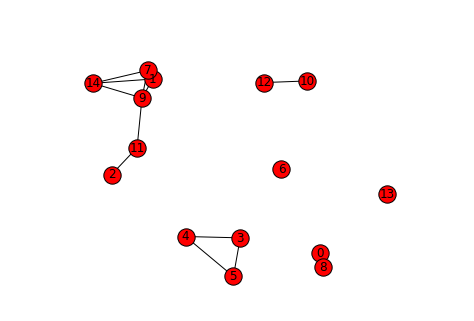

In [170]:
#print(VR.nodes())
#nx.draw(VR,pos)
nx.draw(VR,pos,ax=None,labels=labels)
#plt.show()
#plt.draw(VR)
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.xlabel("X")
# plt.ylabel("Y")

If I knew a networkx more, I would have code that takes in the dictionary of edges incident to a cluster of nodes within the Rips complex, and have networkx overlay those clusters of nodes. Also, I would like to have the grids labeled but I was totally confused by the networkx documentation and how it integrates matplotlib.

### 6.
Write code for the function `RipsGraph(P,d)` as follows. <br/>
Inputs:
- a set of points $P$ $\subset$ $\mathbb{R}^{2}$ given as a $k \times 2$ numpy matrix 
- a diameter $d \ge 0$ 
<br/>

Output:
- The boundary matrix representing the Rips complex $V R(P, d)$.

Some of the foundation of this code is from a blog post by stephenhky found here: <br/>

https://datawarrior.wordpress.com/2015/09/14/tda-2-constructing-connectivities/

I made some changes in order to fit the specifications of this assignment

In [7]:
import numpy as np
import networkx as nx
from itertools import combinations
from scipy.sparse import dok_matrix
from operator import add
from itertools import combinations

In [8]:
#From DataWarrior
#I barely used the code directly for this assignment, but I kept it handy for writing my code

class SimplicialComplex:
    '''Simplicial Complex class that takes a list of simplicies'''
    def __init__(self, simplices=[]):
        self.import_simplices(simplices=simplices)
        #self.faceset = faces(simplices)

    def import_simplices(self, simplices=[]):
        self.simplices = map(lambda simplex: tuple(sorted(simplex)), simplices)
        self.face_set = self.faces()
        
    def faces(self):
        faceset = set()
        for simplex in self.simplices:
            numnodes = len(simplex)
            for r in range(numnodes, 0, -1):
                for face in combinations(simplex, r):
                    faceset.add(face)
        #print(faceset)
        return faceset

    def n_faces(self, n):
        return filter(lambda face: len(face)==n+1, self.face_set)

In [13]:
def mag(x,y):
    return (x**2+y**2)**0.5

def build_bd_matrix(adjacency_dict, incident_edges):
    '''Takes in adjacent_vertices dictionary built from RipsGraph and incident edges'''
    simplex_set = set()
    #iterate through vertices
    for vertex, adjacent_vertices in adjacency_dict.items():
        num_vertices = 1 + len(adjacent_vertices) 
        total_vertices = adjacent_vertices.copy()
        total_vertices.append(vertex) 
        
        #Find all possible complex combinations
        for r in range(num_vertices,0,-1):
            for face in combinations(total_vertices,r):
                simplex_set.add(face)
                
    #Now the building starts
    n = len(simplex_set)
    bd_matrix = np.zeros(shape=(n,n))
    #sort list
    simplex_list = list(simplex_set)
    simplex_list.sort()
    simplex_list.sort(key = lambda s: len(s))
    #iterate through row, column
    row = 0
    for row_bd_matrix in simplex_list:
        col = 0

        for col_bd_matrix in simplex_list:
            #check for codimensionality
            if (len(col_bd_matrix)-len(row_bd_matrix)) == 1:
                bd_matrix[row][col] = 1
                
            col += 1
            
        row += 1
                
    #pardon the inefficiency, I'm scrambling to get this done!
    return bd_matrix


def RipsGraph(P,d):
    dim = len(P)
    g = nx.Graph()    
    #add node at a given position
    for i in range(dim):
        xi,yi= P[i][0], P[i][1]
        g.add_node(i,pos=(xi,yi),label=str(i))
        
    #Define a dictionary with key: vertex, value: adjacent vertices
    adjacent_vertices = {}

    #check to see if it meets Rips complex conditions in a ridiculously inefficient way
    for i in range(dim):
        xi,yi= P[i]
        adjacent_vertices[i] = []

        for j in range(dim):
            #don't count vertices "incident" to each other. Again there's a much better way of doing this
            if i == j:
                continue
            xj,yj = P[j]
            # add edge if it meets the Rips Complex definition
            if mag(xi-xj,yi-yj) <= d:
                g.add_edge(i,j)
                adjacent_vertices[i].append(j)
                
    bd_matrix = build_bd_matrix(adjacent_vertices, g.edges())

    return g, bd_matrix #nx graph 1 skeleton Rips complex

In [14]:
### Test case ###
k = 4
d = 1
P = np.array([[0.0,0.0], [1.0,0],[0.0,1.0], [0.5,0.5]])
VR, bd_matrix = RipsGraph(P,d)
pos=nx.get_node_attributes(VR,'pos')
labels=nx.get_node_attributes(VR,'label')

In [15]:
nx.draw(VR)

In [16]:
#Warning: Doesn't output very well
bd_matrix

array([[ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1

# STOP HERE!! Below is unintelligible scratch code

In [241]:
# sc = SimplicialComplex(P)
# print(sc.face_set)

(2,)


TypeError: 'tuple' object cannot be interpreted as an integer

In [195]:
#bd_matrix = np.zeros((n,n))
A = nx.incidence_matrix(VR)
print(A)
#edge_list = VR.edges().copy()
#edge_list

  (0, 0)	1.0
  (1, 0)	1.0
  (0, 1)	1.0
  (2, 1)	1.0
  (0, 2)	1.0
  (3, 2)	1.0
  (1, 3)	1.0
  (3, 3)	1.0
  (2, 4)	1.0
  (3, 4)	1.0


In [2]:
import numpy as np
from itertools import combinations
from scipy.sparse import dok_matrix
from operator import add

In [19]:
# def faces(simplices):
#     faceset = set()
#     for simplex in simplices:
#         numnodes = len(simplex)
#         for r in range(numnodes, 0, -1):
#             for face in combinations(simplex, r):
#                 faceset.add(face)
#     #print(faceset)
#     return faceset

class SimplicialComplex:
    '''Simplicial Complex class that takes a list of simplicies'''
    def __init__(self, simplices=[]):
        self.import_simplices(simplices=simplices)
        #self.faceset = faces(simplices)

    def import_simplices(self, simplices=[]):
        self.simplices = map(lambda simplex: tuple(sorted(simplex)), simplices)
        self.face_set = self.faces()
        
    def faces(self):
        faceset = set()
        for simplex in self.simplices:
            numnodes = len(simplex)
            for r in range(numnodes, 0, -1):
                for face in combinations(simplex, r):
                    faceset.add(face)
        #print(faceset)
        return faceset

    def n_faces(self, n):
        return filter(lambda face: len(face)==n+1, self.face_set)

In [20]:
import networkx as nx
from scipy.spatial import distance
from itertools import product


class RipsGraph(SimplicialComplex):
    '''Main Rips complex class. Takes in points [k x 2 numpy matrix] epsilon (aka diameter) [float]'''
    def __init__(self, points, epsilon, labels=None, distfcn=distance.euclidean):
        self.pts = points
        self.labels = range(len(self.pts)) if labels==None or len(labels)!=len(self.pts) else labels
        self.epsilon = epsilon
        self.distfcn = distfcn
        self.network = self.construct_network(self.pts, self.labels, self.epsilon, self.distfcn)
        self.import_simplices(map(tuple, list(nx.find_cliques(self.network))))
 
    def construct_network(self, points, labels, epsilon, distfcn):
        g = nx.Graph()
        g.add_nodes_from(labels)
        zips = zip(points, labels)
        for pair in product(zips, zips):
            if pair[0][1]!=pair[1][1]:
                dist = distfcn(pair[0][0], pair[1][0])
            if dist<epsilon:
                g.add_edge(pair[0][1], pair[1][1])
        return g

In [25]:
k = 15
d = 0.25
P = np.random.random((k,2))
print(P)
VR = RipsGraph(P,d)

[[ 0.98755571  0.55049392]
 [ 0.92487665  0.27596724]
 [ 0.19513789  0.72776201]
 [ 0.10027851  0.31313413]
 [ 0.09222967  0.02820615]
 [ 0.23399411  0.91388256]
 [ 0.56914593  0.08409709]
 [ 0.2698529   0.99297778]
 [ 0.80885336  0.85904541]
 [ 0.70812128  0.93601662]
 [ 0.47907451  0.19355198]
 [ 0.03816229  0.59030163]
 [ 0.75879256  0.04529054]
 [ 0.2984449   0.89088115]
 [ 0.31943399  0.57789498]]


In [246]:
sc = SimplicialComplex(simplices=[(1,2,3,4)])
sc.face_set

(4,)


TypeError: 'tuple' object cannot be interpreted as an integer

In [33]:
nx.draw(VR)

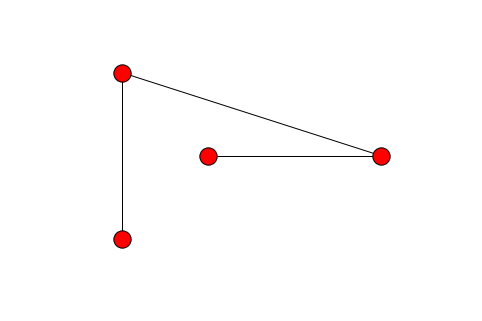

In [71]:
G = nx.path_graph(4)
shells = [[0], [1, 2, 3]]
pos = nx.shell_layout(G, shells)
nx.draw(G,pos)

In [103]:
import numpy as np
from itertools import combinations
from scipy.sparse import dok_matrix
from operator import add


In [104]:
class SimplicialComplex:
    def __init__(self, simplices=[]):
        self.import_simplices(simplices=simplices)

    def import_simplices(self, simplices=[]):
        self.simplices = map(lambda simplex: tuple(sorted(simplex)), simplices)
        self.face_set = self.faces()

In [105]:
import networkx as nx
from scipy.spatial import distance
from itertools import product

 
class VietorisRipsComplex(SimplicialComplex):
    def __init__(self, points, epsilon, labels=None, distfcn=distance.euclidean):
        self.pts = points
        self.labels = range(len(self.pts)) if labels==None or len(labels)!=len(self.pts) else labels
        self.epsilon = epsilon
        self.distfcn = distfcn
        self.network = self.construct_network(self.pts, self.labels, self.epsilon, self.distfcn)
        self.import_simplices(map(tuple, list(nx.find_cliques(self.network))))
 
    def construct_network(self, points, labels, epsilon, distfcn):
        g = nx.Graph()
        g.add_nodes_from(labels)
        zips = zip(points, labels)
        for pair in product(zips, zips):
            if pair[0][1]!=pair[1][1]:
                dist = distfcn(pair[0][0], pair[1][0])
            if dist<epsilon:
                g.add_edge(pair[0][1], pair[1][1])
        return g

In [ ]:
A = 